<a href="https://colab.research.google.com/github/Jaydeep268/Driver-Distraction-Classification/blob/main/Distracted_Driver_MultiAction_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!apt install unzip

In [ ]:
!unzip  '/content/drive/My Drive/state-farm-distracted-driver-detection.zip' -d '/content/drive/My Drive/Distracted_driver'

Archive:  /content/drive/My Drive/state-farm-distracted-driver-detection.zip
  inflating: /content/drive/My Drive/Distracted_driver/sample_submission.csv  
  inflating: /content/drive/My Drive/Distracted_driver/driver_imgs_list.csv  
  inflating: /content/drive/My Drive/Distracted_driver/imgs.zip  

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 #opencv library
import glob
import matplotlib.pyplot as plt  #plotting library
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import tensorflow
import random
from keras.callbacks import EarlyStopping
from PIL import Image # Image modelling and processing library 
import h5py
import os


In [ ]:
!unzip '/content/drive/My Drive/Distracted_driver/imgs.zip' -d  '/content/drive/My Drive/Distracted_driver'

unzip:  cannot find or open /content/drive/My Drive/Distracted_driver/imgs.zip, /content/drive/My Drive/Distracted_driver/imgs.zip.zip or /content/drive/My Drive/Distracted_driver/imgs.zip.ZIP.


In [ ]:
print(os.listdir("/content/drive/My Drive/Distracted_driver"))

[]


In [ ]:
directory = '/content/drive/My Drive/Distracted_driver/train'
test_directory = '/content/drive/My Drive/Distracted_driver/test'
classes = ['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9']

In [ ]:
training_data = []
testing_data = []

In [ ]:
def create_training_data():
    for category in classes:
        path = os.path.join(directory,category)
        class_num = classes.index(category)
        
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_img = cv2.resize(img_array,(240,240))
            training_data.append([
                new_img,class_num])

In [ ]:
def create_testing_data():        
    for img in os.listdir(test_directory):
        img_array = cv2.imread(os.path.join(test_directory,img),cv2.IMREAD_GRAYSCALE)
        new_img = cv2.resize(img_array,(240,240))
        testing_data.append([img,
            new_img])


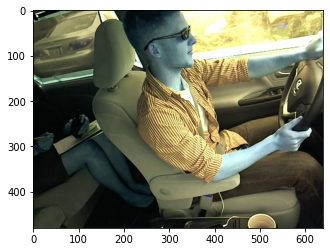

In [ ]:
for i in classes:
    path = os.path.join(directory,i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

In [ ]:
create_training_data()
create_testing_data()

In [ ]:
import random

In [ ]:
random.shuffle(training_data)
x = []
y = []
for features, label in training_data:
    x.append(features)
    y.append(label)

NameError: ignored

In [ ]:
x[0].shape

(240, 240)

In [ ]:
y[0:20]

[2, 1, 0, 4, 5, 8, 4, 1, 3, 5, 0, 7, 0, 4, 4, 4, 0, 0, 7, 9]

In [ ]:
from keras.utils import np_utils
y_cat = np_utils.to_categorical(y,num_classes=10)

In [ ]:
y_cat[0:10]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
import numpy as np


In [ ]:
X = np.array(x).reshape(-1,240,240,1)
X[0].shape

(240, 240, 1)

In [ ]:
X.shape

(22424, 240, 240, 1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y_cat,test_size=0.3,random_state=50)

NameError: ignored

In [ ]:
print("Shape of train images is:", X_train.shape)
print("Shape of validation images is:", X_test.shape)
print("Shape of labels is:", y_train.shape)
print("Shape of labels is:", y_test.shape)

Shape of train images is: (15696, 240, 240, 1)
Shape of validation images is: (6728, 240, 240, 1)
Shape of labels is: (15696, 10)
Shape of labels is: (6728, 10)


In [ ]:
batch_size = 128
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization

In [ ]:
model = models.Sequential()

## CNN 1
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(240,240,1)))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.2))

## CNN 2
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.3))

## CNN 3
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.5))

## CNN 3
#model.add(Conv2D(256,(5,5),activation='relu',padding='same'))
#model.add(BatchNormalization(axis = 3))
#model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
#model.add(Dropout(0.5))

## Dense & Output
model.add(Flatten())
model.add(Dense(units = 512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units = 128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 238, 238, 32)      320       
_________________________________________________________________
batch_normalization (BatchNo (None, 238, 238, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 238, 238, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 238, 238, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 119, 119, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 119, 119, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 119, 119, 64)      1

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
callbacks = [EarlyStopping(monitor='val_accuracy',patience=5)]

In [ ]:
results = model.fit(X_train,y_train,batch_size=batch_size,epochs=12,verbose=1,validation_data=(X_test,y_test),callbacks=callbacks)

Epoch 1/12


In [ ]:
test_img = np.array(testing_data[1][1]).reshape(-1,240,240,1)

In [ ]:
preds = model.predict(test_img)
class_idx = np.argmax(preds[0])
class_output = model.output[:, class_idx]

In [ ]:
class_idx

In [ ]:
model.save_weights('/content/drive/My Drive/DeepLearning_project/driverdistraction_weights.h5')

In [ ]:
model.save('/content/drive/My Drive/DeepLearning_project/driverdistraction.h5')

In [ ]:
!rm -rf '/content/drive/My Drive/DeepLearning_project'